In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from wordcloud import WordCloud
from arabic_reshaper import arabic_reshaper
from bidi.algorithm import get_display
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob

%matplotlib inline
plt.style.use('fivethirtyeight')

C:\Users\omar mohamed\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
C:\Users\omar mohamed\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('archive\stories_faits-divers.csv')
df2= pd.read_csv('archive\stories_art-et-culture.csv')
df3= pd.read_csv('archive\stories_regions.csv')
df4= pd.read_csv('archive\stories_sport.csv')
df5= pd.read_csv('archive\stories_medias.csv')
df6= pd.read_csv('archive\stories_economie.csv')
df7= pd.read_csv('archive\stories_tamazight.csv')
df8= pd.read_csv('archive\stories_societe.csv')
df9= pd.read_csv('archive\stories_orbites.csv')
df10= pd.read_csv('archive\stories_politique.csv')
df11= pd.read_csv('archive\stories_marocains-du-monde.csv')

In [3]:
df = df.append([df2,df3,df4,df5,df6,df7,df8,df9,df10,df11],ignore_index=True).drop(['Unnamed: 0','id'],axis=1).sample(frac = 1,ignore_index=True)

In [4]:
df.head()

,title,date,author,story,topic
0,سلطان عمان يطمئن هاتفيا على صحة ملك البلاد,الأربعاء 24 يونيو 2020 - 17:15,هسبريس من الرباط,اتصل السلطان هيثم بن طارق بن تيمور، سلطان عمان...,orbites
1,"7 إصابات جديدة بـ""كورونا"" ضمن فريق ابن جرير",السبت 05 شتنبر 2020 - 23:54,هسبورت - حمزة اشتيوي,أوضح عبد الرزاق غفار، رئيس نادي شباب ابن جرير ...,sport
2,مقاولات تراهن على الاستثمار العمومي لإنعاش الا...,الاثنين 03 غشت 2020 - 09:00,هسبريس من الدار البيضاء,تراهن المقاولات المغربية العاملة في مجال البنا...,economie
3,الملتقى الأول للتأطير والتعليم الرقمي ينطلق ال...,الثلاثاء 25 غشت 2020 - 06:29,هسبريس من الرباط,"تحت شعار ""معاً للنهوض بالمنظومة الرقمية للتعلي...",societe
4,‪الرجاء يطلب أداء غرامة 400 مليون سنتيم بالتقسيط‬,الجمعة 03 أبريل 2020 - 18:40,أوعنا بلعيد,تراجع فريق الرجاء الرياضي لكرة القدم في آخر لح...,sport


In [5]:
df.shape

(11000, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   11000 non-null  object
 1   date    11000 non-null  object
 2   author  11000 non-null  object
 3   story   11000 non-null  object
 4   topic   11000 non-null  object
dtypes: object(5)
memory usage: 429.8+ KB


In [7]:
df.isnull().sum()

title     0
date      0
author    0
story     0
topic     0
dtype: int64

In [8]:
df.duplicated().sum()

2

In [9]:
#drop duplicated
df.drop_duplicates(inplace=True)

In [10]:
df.head()

,title,date,author,story,topic
0,سلطان عمان يطمئن هاتفيا على صحة ملك البلاد,الأربعاء 24 يونيو 2020 - 17:15,هسبريس من الرباط,اتصل السلطان هيثم بن طارق بن تيمور، سلطان عمان...,orbites
1,"7 إصابات جديدة بـ""كورونا"" ضمن فريق ابن جرير",السبت 05 شتنبر 2020 - 23:54,هسبورت - حمزة اشتيوي,أوضح عبد الرزاق غفار، رئيس نادي شباب ابن جرير ...,sport
2,مقاولات تراهن على الاستثمار العمومي لإنعاش الا...,الاثنين 03 غشت 2020 - 09:00,هسبريس من الدار البيضاء,تراهن المقاولات المغربية العاملة في مجال البنا...,economie
3,الملتقى الأول للتأطير والتعليم الرقمي ينطلق ال...,الثلاثاء 25 غشت 2020 - 06:29,هسبريس من الرباط,"تحت شعار ""معاً للنهوض بالمنظومة الرقمية للتعلي...",societe
4,‪الرجاء يطلب أداء غرامة 400 مليون سنتيم بالتقسيط‬,الجمعة 03 أبريل 2020 - 18:40,أوعنا بلعيد,تراجع فريق الرجاء الرياضي لكرة القدم في آخر لح...,sport


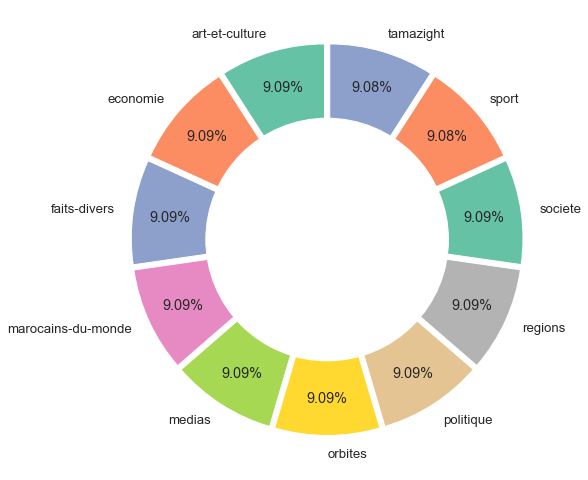

In [57]:
sns.set(font_scale = 1.2)
plt.figure(figsize=(8,8))

plt.pie(
    x=df.topic.value_counts(), labels = np.unique(df.topic),
    colors=sns.color_palette('Set2'),
    startangle=90,
    # show percentages
    autopct='%1.2f%%',
    # move the percentage inside the arcs
    pctdistance=0.80,
    # add space between the arcs
    explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05]
)

### Add a hole in the pie  
hole = plt.Circle((0, 0), 0.65, facecolor='white')
plt.gcf().gca().add_artist(hole)

plt.show()

In [40]:
df.author.value_counts()[:10]

هسبريس من الرباط               3941
أوعنا بلعيد                     400
هسبريس - محمد الراجي            344
هسبريس - وائل بورشاشن           242
هسبريس - أمال كنين              230
هسبريس - عبد الرحيم العسري      190
هسبريس ـ فاطمة الزهراء صدور     185
إبراهيم مغراوي من مراكش         183
هسبريس من الدار البيضاء         174
هسبريس - عبد السلام الشامخ      157
Name: author, dtype: int64

In [45]:
df.author.value_counts()[:10]

هسبريس من الرباط               3941
أوعنا بلعيد                     400
هسبريس - محمد الراجي            344
هسبريس - وائل بورشاشن           242
هسبريس - أمال كنين              230
هسبريس - عبد الرحيم العسري      190
هسبريس ـ فاطمة الزهراء صدور     185
إبراهيم مغراوي من مراكش         183
هسبريس من الدار البيضاء         174
هسبريس - عبد السلام الشامخ      157
Name: author, dtype: int64

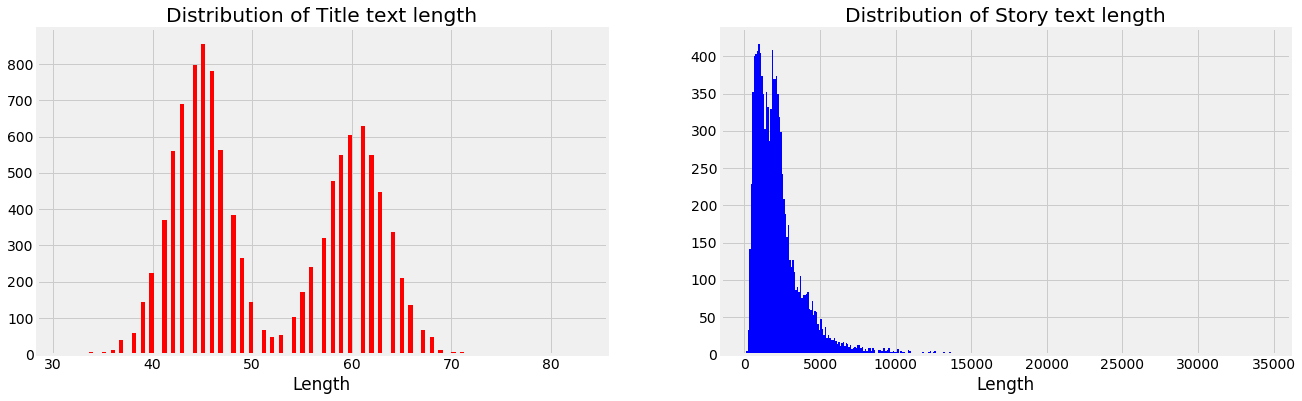

In [13]:
plt.figure(figsize=(20,6))
plt.style.use('fivethirtyeight')

plt.subplot(1,2,1)
fake_len = df['title'].str.len()
plt.hist(fake_len,bins=120,color='red')
plt.title('Distribution of Title text length')
plt.xlabel('Length')

plt.subplot(1,2,2)
nonfake_len = df['story'].str.len()
plt.hist(nonfake_len,bins=350,color='blue')
plt.title('Distribution of Story text length')
plt.xlabel('Length')

plt.show()


In [14]:
stops = set(stopwords.words("arabic"))
stop_word_comp = {"،","آض","آمينَ","آه","آهاً","آي","أ","أب","أجل","أجمع","أخ","أخذ","أصبح","أضحى","أقبل","أقل","أكثر","ألا","أم","أما","أمامك","أمامكَ","أمسى","أمّا","أن","أنا","أنت","أنتم","أنتما","أنتن","أنتِ","أنشأ","أنّى","أو","أوشك","أولئك","أولئكم","أولاء","أولالك","أوّهْ","أي","أيا","أين","أينما","أيّ","أَنَّ","أََيُّ","أُفٍّ","إذ","إذا","إذاً","إذما","إذن","إلى","إليكم","إليكما","إليكنّ","إليكَ","إلَيْكَ","إلّا","إمّا","إن","إنّما","إي","إياك","إياكم","إياكما","إياكن","إيانا","إياه","إياها","إياهم","إياهما","إياهن","إياي","إيهٍ","إِنَّ","ا","ابتدأ","اثر","اجل","احد","اخرى","اخلولق","اذا","اربعة","ارتدّ","استحال","اطار","اعادة","اعلنت","اف","اكثر","اكد","الألاء","الألى","الا","الاخيرة","الان","الاول","الاولى","التى","التي","الثاني","الثانية","الذاتي","الذى","الذي","الذين","السابق","الف","اللائي","اللاتي","اللتان","اللتيا","اللتين","اللذان","اللذين","اللواتي","الماضي","المقبل","الوقت","الى","اليوم","اما","امام","امس","ان","انبرى","انقلب","انه","انها","او","اول","اي","ايار","ايام","ايضا","ب","بات","باسم","بان","بخٍ","برس","بسبب","بسّ","بشكل","بضع","بطآن","بعد","بعض","بك","بكم","بكما","بكن","بل","بلى","بما","بماذا","بمن","بن","بنا","به","بها","بي","بيد","بين","بَسْ","بَلْهَ","بِئْسَ","تانِ","تانِك","تبدّل","تجاه","تحوّل","تلقاء","تلك","تلكم","تلكما","تم","تينك","تَيْنِ","تِه","تِي","ثلاثة","ثم","ثمّ","ثمّة","ثُمَّ","جعل","جلل","جميع","جير","حار","حاشا","حاليا","حاي","حتى","حرى","حسب","حم","حوالى","حول","حيث","حيثما","حين","حيَّ","حَبَّذَا","حَتَّى","حَذارِ","خلا","خلال","دون","دونك","ذا","ذات","ذاك","ذانك","ذانِ","ذلك","ذلكم","ذلكما","ذلكن","ذو","ذوا","ذواتا","ذواتي","ذيت","ذينك","ذَيْنِ","ذِه","ذِي","راح","رجع","رويدك","ريث","رُبَّ","زيارة","سبحان","سرعان","سنة","سنوات","سوف","سوى","سَاءَ","سَاءَمَا","شبه","شخصا","شرع","شَتَّانَ","صار","صباح","صفر","صهٍ","صهْ","ضد","ضمن","طاق","طالما","طفق","طَق","ظلّ","عاد","عام","عاما","عامة","عدا","عدة","عدد","عدم","عسى","عشر","عشرة","علق","على","عليك","عليه","عليها","علًّ","عن","عند","عندما","عوض","عين","عَدَسْ","عَمَّا","غدا","غير","ـ","ف","فان","فلان","فو","فى","في","فيم","فيما","فيه","فيها","قال","قام","قبل","قد","قطّ","قلما","قوة","كأنّما","كأين","كأيّ","كأيّن","كاد","كان","كانت","كذا","كذلك","كرب","كل","كلا","كلاهما","كلتا","كلم","كليكما","كليهما","كلّما","كلَّا","كم","كما","كي","كيت","كيف","كيفما","كَأَنَّ","كِخ","لئن","لا","لات","لاسيما","لدن","لدى","لعمر","لقاء","لك","لكم","لكما","لكن","لكنَّما","لكي","لكيلا","للامم","لم","لما","لمّا","لن","لنا","له","لها","لو","لوكالة","لولا","لوما","لي","لَسْتَ","لَسْتُ","لَسْتُم","لَسْتُمَا","لَسْتُنَّ","لَسْتِ","لَسْنَ","لَعَلَّ","لَكِنَّ","لَيْتَ","لَيْسَ","لَيْسَا","لَيْسَتَا","لَيْسَتْ","لَيْسُوا","لَِسْنَا","ما","ماانفك","مابرح","مادام","ماذا","مازال","مافتئ","مايو","متى","مثل","مذ","مساء","مع","معاذ","مقابل","مكانكم","مكانكما","مكانكنّ","مكانَك","مليار","مليون","مما","ممن","من","منذ","منها","مه","مهما","مَنْ","مِن","نحن","نحو","نعم","نفس","نفسه","نهاية","نَخْ","نِعِمّا","نِعْمَ","ها","هاؤم","هاكَ","هاهنا","هبّ","هذا","هذه","هكذا","هل","هلمَّ","هلّا","هم","هما","هن","هنا","هناك","هنالك","هو","هي","هيا","هيت","هيّا","هَؤلاء","هَاتانِ","هَاتَيْنِ","هَاتِه","هَاتِي","هَجْ","هَذا","هَذانِ","هَذَيْنِ","هَذِه","هَذِي","هَيْهَاتَ","و","و6","وا","واحد","واضاف","واضافت","واكد","وان","واهاً","واوضح","وراءَك","وفي","وقال","وقالت","وقد","وقف","وكان","وكانت","ولا","ولم","ومن","مَن","وهو","وهي","ويكأنّ","وَيْ","وُشْكَانََ","يكون","يمكن","يوم","ّأيّان"}

def remove_stop_words(text):
    zen = TextBlob(text)
    words = zen.words
    return " ".join([w for w in words if not w in stops and not w in stop_word_comp and len(w) >= 2])
df['story'] = df['story'].apply(lambda x:remove_stop_words(x))

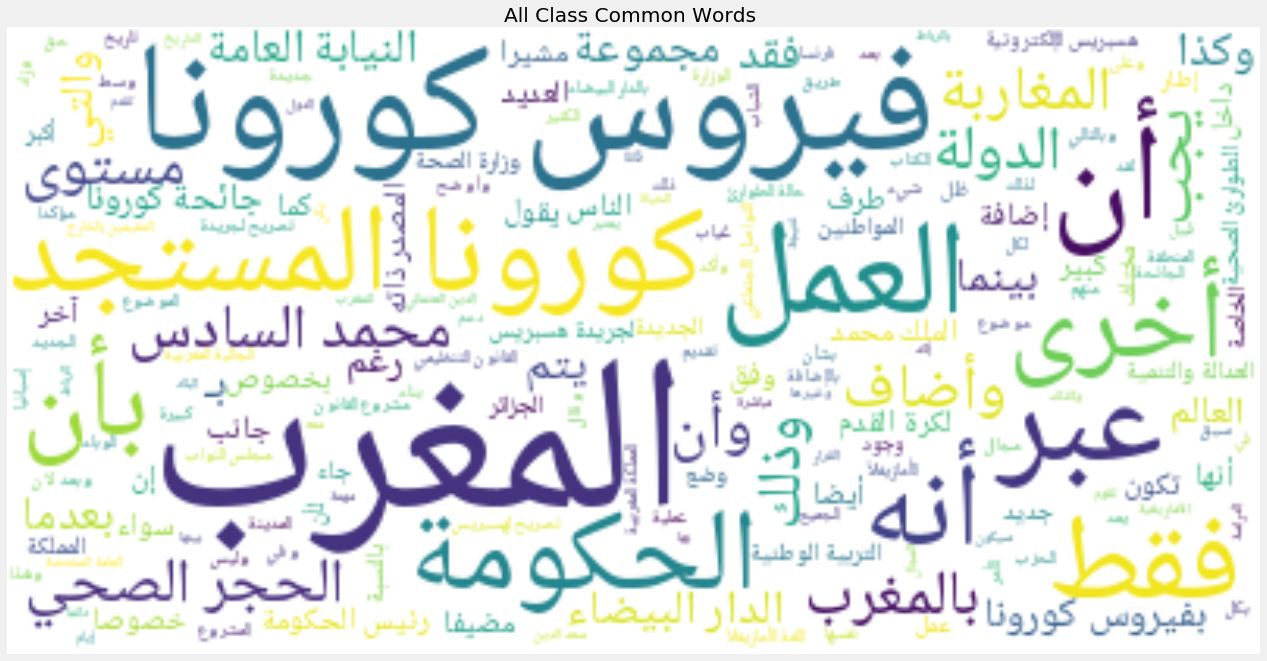

In [25]:
plt.figure(figsize=(20,20))

text = df['story']
text = [''.join(sentence) for sentence in text]
text = ''.join(text)



reshaped_text = arabic_reshaper.reshape(text)
arabic_text = get_display(reshaped_text)
wordcloud = WordCloud(max_words=200 , background_color='white' ,font_path="NotoNaskhArabic-Regular.ttf").generate(arabic_text)

# Show it
plt.imshow(wordcloud,interpolation='bilinear')
plt.title('All Class Common Words ')
plt.axis('off')
plt.show()

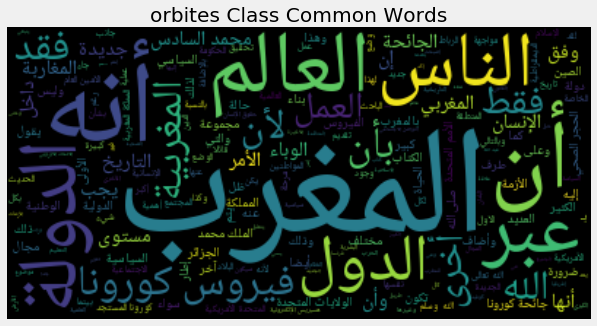

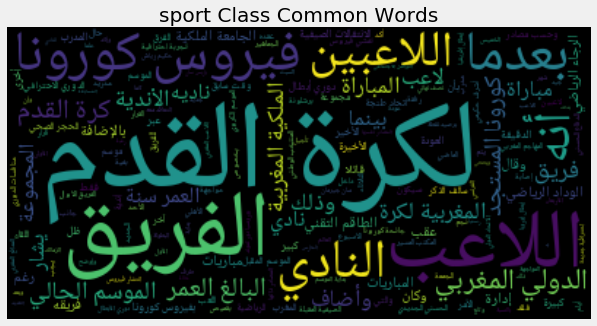

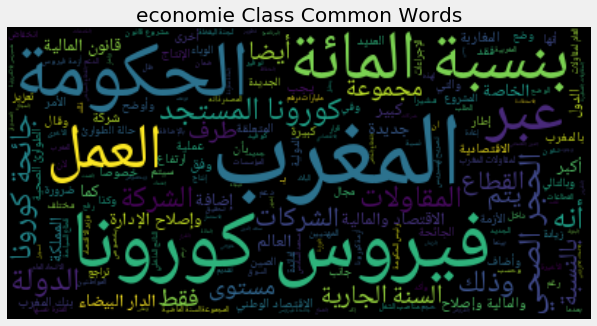

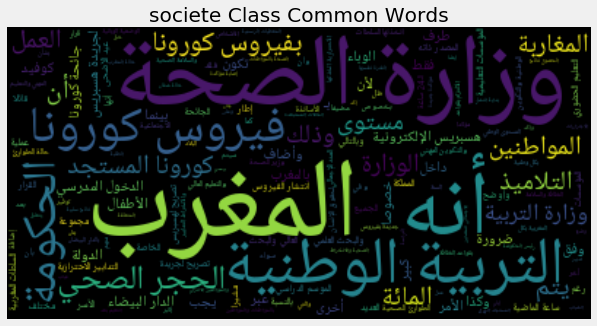

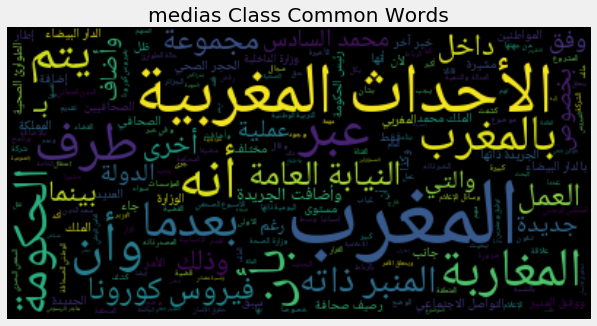

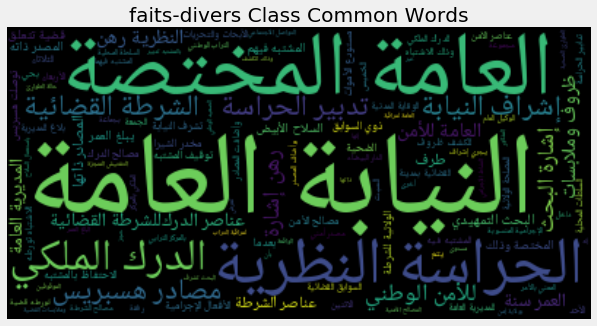

In [51]:
for col in df['topic'].unique()[:6]:
    plt.figure(figsize=(10 ,5))
    
    text = df[df['topic'] == col].story
    text = [''.join(sentence) for sentence in text]
    text = ''.join(text)
    
    
    
    reshaped_text = arabic_reshaper.reshape(text)
    arabic_text = get_display(reshaped_text)
    wordcloud = WordCloud(max_words=200 , background_color='black' ,font_path="NotoNaskhArabic-Regular.ttf").generate(arabic_text)
    
    # Show it
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title('{} Class Common Words'.format(col))
    plt.axis('off')
    plt.show()

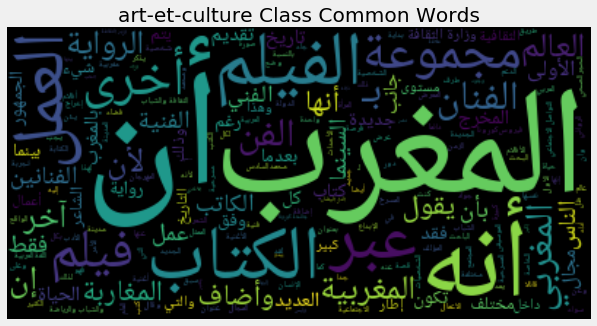

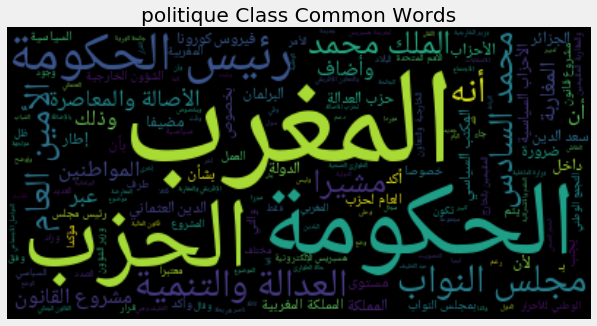

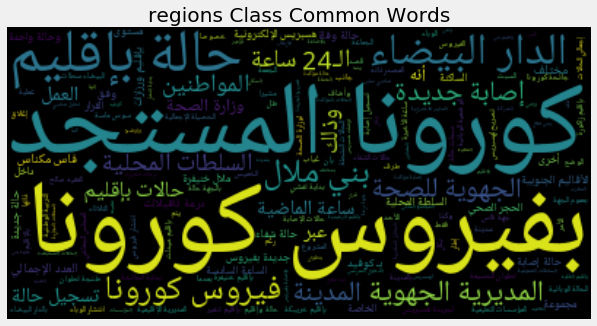

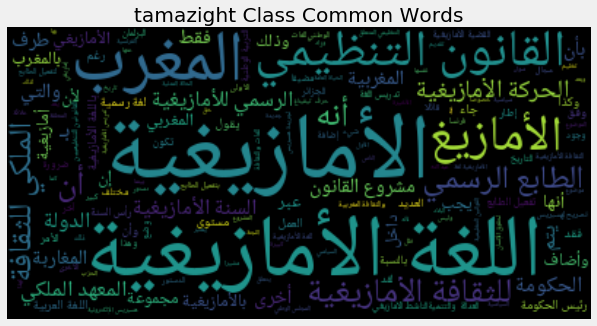

In [50]:
for col in df['topic'].unique()[7:]:
    plt.figure(figsize=(10 ,5))
    
    text = df[df['topic'] == col].story
    text = [''.join(sentence) for sentence in text]
    text = ''.join(text)
    
    
    
    reshaped_text = arabic_reshaper.reshape(text)
    arabic_text = get_display(reshaped_text)
    wordcloud = WordCloud(max_words=200 , background_color='black' ,font_path="NotoNaskhArabic-Regular.ttf").generate(arabic_text)
    
    # Show it
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.title('{} Class Common Words'.format(col))
    plt.axis('off')
    plt.show()